###1.패키지 불러옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

###2.데이터 가져오기

In [ ]:
# df = pd.read_csv('')

df = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/최종병합데이터_소현.csv')


###3.데이터 형태 확인

In [ ]:
# describe(include='all') info head tail shape

df.describe(include='all')

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
count,428.000000,428,428,428,4.280000e+02,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,NaN,426,25,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,강동구 상일1동,송파구,신사동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,27,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,213.500000,NaN,NaN,NaN,1.143530e+09,130.341121,44.079439,26.464953,196.011682,39.441589,717.946262,0.635514,7425.511682,666.574766,1.294393,1960.967290
std,123.697211,NaN,NaN,NaN,1.924084e+07,97.623832,89.288881,14.945528,182.933761,47.610627,538.708395,0.776017,3726.659996,400.228461,3.612659,3762.553622
min,0.000000,NaN,NaN,NaN,1.111052e+09,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,255.000000
25%,106.750000,NaN,NaN,NaN,1.126066e+09,51.000000,0.000000,15.000000,91.750000,12.000000,300.750000,0.000000,4937.000000,433.000000,0.000000,434.000000
50%,213.500000,NaN,NaN,NaN,1.144066e+09,112.000000,0.000000,24.000000,147.000000,25.000000,616.000000,0.000000,6867.500000,524.000000,0.000000,564.000000
75%,320.250000,NaN,NaN,NaN,1.162055e+09,193.250000,42.250000,34.000000,248.000000,52.000000,1062.000000,1.000000,8964.750000,893.000000,0.000000,1998.000000


In [ ]:
df.columns

Index(['Unnamed: 0', '행정동명', '시군구명', '행정동명.1', '행정동코드', 'CCTV개수', '가로등개수',
       '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수', '자동차소유대수', '22년 음주단속수',
       '사고건수', '음주운전_y'],
      dtype='object')

In [ ]:
# 시군구별로 평균
col2=['CCTV개수', '가로등개수',
       '버스정류소개수', '음식점개수', '주점개수',
      '주차장개수', '지하철역개수', '자동차소유대수', '22년 음주단속수',
       '사고건수']
df_mean = df.groupby('시군구명')[col2].mean()

In [ ]:
# 사고건수가 0이 아닌 행만 필터링
df1 = df[df['사고건수'] != 0]

### 상관계수 확인

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


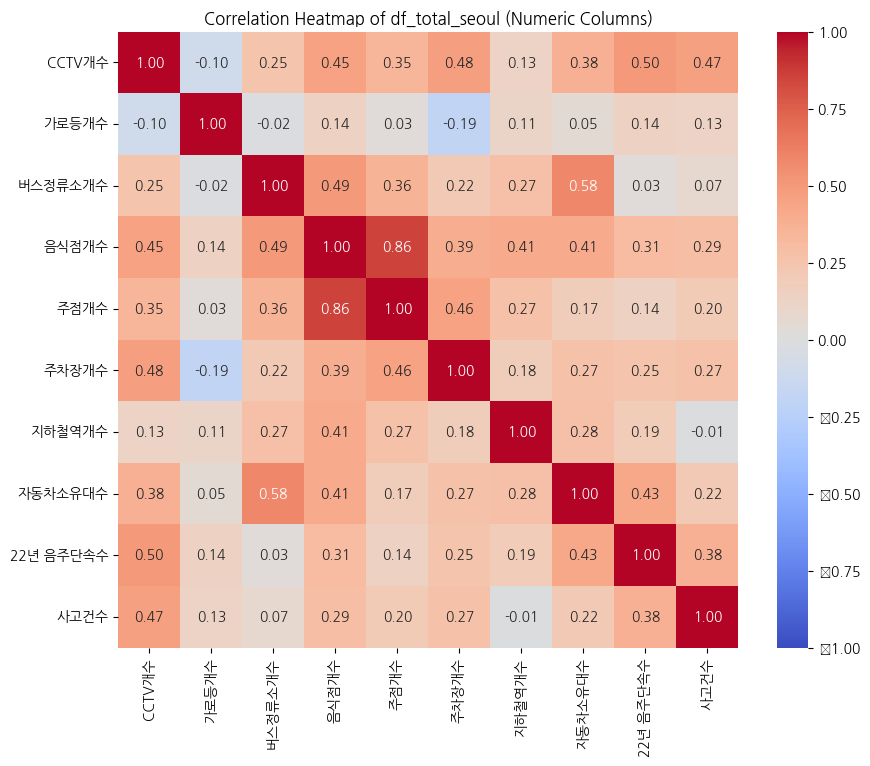

In [ ]:
col1=['CCTV개수', '가로등개수',
       '버스정류소개수', '음식점개수', '주점개수',
      '주차장개수', '지하철역개수', '자동차소유대수', '22년 음주단속수',
       '사고건수']

matrix = df1[col1].corr()
# matrix = df_mean.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f',
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap of df_total_seoul (Numeric Columns)')
plt.show()

In [ ]:
# 행정동별 분석시
# 음주단속은 cctv와 자동차소유, 음식점수, 주차장수 순서로 연관
# 사고건수도 위와 비슷하게 cctv,자동차,주차장,음식점, 주점과 연관성을 보임

# 시군구로 병합후 분석시
# 사고건수는 CCTV, 음식점, 자동차소유대수, 지하철역수
# 음주단속 건수는 음식점수, 가로등수, 지하철역, 자동차소유대수

# 공통적으로 버스정류소와는 무관함

###4.군집분석